In [9]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import pandas_profiling
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_curve,auc,recall_score,precision_score,accuracy_score,f1_score
from sklearn.metrics import confusion_matrix,average_precision_score, recall_score
import seaborn as sns
%matplotlib inline

In [10]:
pwd()

'C:\\Users\\Somesh\\Practicals'

In [11]:
#print multiple statements in same line
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity ="all"

In [12]:
rpTestData=pd.read_excel('WA_Fn-UseC_-Telco-Customer-Churn.xlsx')
rpTestData.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Exploratory Data Analysis

In [13]:
pandas_profiling.ProfileReport(rpTestData)

Number of variables,21
Number of observations,7032
Total Missing (%),0.0%
Total size in memory,1.1 MiB
Average record size in memory,168.0 B
Numeric,3
Categorical,16
Boolean,1
Date,0
Text (Unique),1
Rejected,0


In [14]:
rpTestData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
customerID          7032 non-null object
gender              7032 non-null object
SeniorCitizen       7032 non-null int64
Partner             7032 non-null object
Dependents          7032 non-null object
tenure              7032 non-null int64
PhoneService        7032 non-null object
MultipleLines       7032 non-null object
InternetService     7032 non-null object
OnlineSecurity      7032 non-null object
OnlineBackup        7032 non-null object
DeviceProtection    7032 non-null object
TechSupport         7032 non-null object
StreamingTV         7032 non-null object
StreamingMovies     7032 non-null object
Contract            7032 non-null object
PaperlessBilling    7032 non-null object
PaymentMethod       7032 non-null object
MonthlyCharges      7032 non-null float64
TotalCharges        7032 non-null float64
Churn               7032 non-null object
dtypes: float64(2), int64(2), ob

In [15]:
rpTestData.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [16]:
print('Counts of Labels')
rpTestData.groupby("Churn").size()

Counts of Labels


Churn
No     5163
Yes    1869
dtype: int64

# Data Visualization

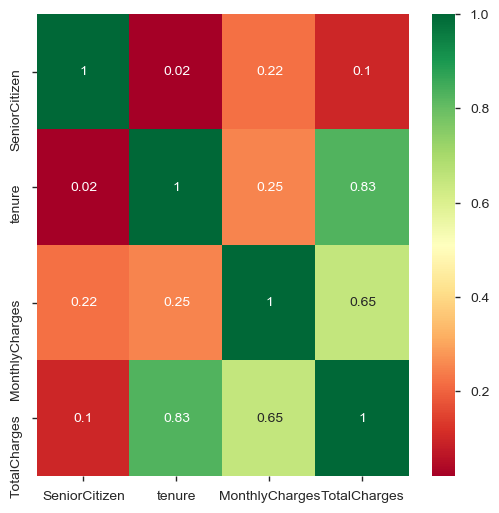

In [17]:
# compute the pair wise correlation for all columns  
correlation_matrix = rpTestData.corr().round(2)
plt.subplots(figsize=(6,6))
# use the heatmap function from seaborn to plot the correlation matrix
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, cmap='RdYlGn',annot=True)
plt.show();

In [18]:
dummyCoding = pd.DataFrame(rpTestData, columns = ['Churn','Contract','Dependents','DeviceProtection','gender','InternetService','MultipleLines','OnlineBackup','OnlineSecurity','PaperlessBilling','Partner','PaymentMethod','PhoneService','StreamingMovies','StreamingTV','TechSupport'])
dummyCoding

,Churn,Contract,Dependents,DeviceProtection,gender,InternetService,MultipleLines,OnlineBackup,OnlineSecurity,PaperlessBilling,Partner,PaymentMethod,PhoneService,StreamingMovies,StreamingTV,TechSupport
0,No,Month-to-month,No,No,Female,DSL,No phone service,Yes,No,Yes,Yes,Electronic check,No,No,No,No
1,No,One year,No,Yes,Male,DSL,No,No,Yes,No,No,Mailed check,Yes,No,No,No
2,Yes,Month-to-month,No,No,Male,DSL,No,Yes,Yes,Yes,No,Mailed check,Yes,No,No,No
3,No,One year,No,Yes,Male,DSL,No phone service,No,Yes,No,No,Bank transfer (automatic),No,No,No,Yes
4,Yes,Month-to-month,No,No,Female,Fiber optic,No,No,No,Yes,No,Electronic check,Yes,No,No,No
5,Yes,Month-to-month,No,Yes,Female,Fiber optic,Yes,No,No,Yes,No,Electronic check,Yes,Yes,Yes,No
6,No,Month-to-month,Yes,No,Male,Fiber optic,Yes,Yes,No,Yes,No,Credit card (automatic),Yes,No,Yes,No
7,No,Month-to-month,No,No,Female,DSL,No phone service,No,Yes,No,No,Mailed check,No,No,No,No
8,Yes,Month-to-month,No,Yes,Female,Fiber optic,Yes,No,No,Yes,Yes,Electronic check,Yes,Yes,Yes,Yes
9,No,One year,Yes,No,Male,DSL,No,Yes,Yes,No,No,Bank transfer (automatic),Yes,No,No,No


In [19]:
for col in rpTestData.columns:
    if rpTestData[col].dtype=='object':
        rpTestData[col]=pd.Categorical(rpTestData[col]).codes

In [20]:
rpTestData

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5365,0,0,1,0,1,0,1,0,0,...,0,0,0,0,0,1,2,29.85,29.85,0
1,3953,1,0,0,0,34,1,0,0,2,...,2,0,0,0,1,0,3,56.95,1889.50,0
2,2558,1,0,0,0,2,1,0,0,2,...,0,0,0,0,0,1,3,53.85,108.15,1
3,5524,1,0,0,0,45,0,1,0,2,...,2,2,0,0,1,0,0,42.30,1840.75,0
4,6500,0,0,0,0,2,1,0,1,0,...,0,0,0,0,0,1,2,70.70,151.65,1
5,6540,0,0,0,0,8,1,2,1,0,...,2,0,2,2,0,1,2,99.65,820.50,1
6,1001,1,0,0,1,22,1,2,1,0,...,0,0,2,0,0,1,1,89.10,1949.40,0
7,4760,0,0,0,0,10,0,1,0,2,...,0,0,0,0,0,0,3,29.75,301.90,0
8,5593,0,0,1,0,28,1,2,1,0,...,2,2,2,2,0,1,2,104.80,3046.05,1
9,4524,1,0,0,1,62,1,0,0,2,...,0,0,0,0,1,0,0,56.15,3487.95,0


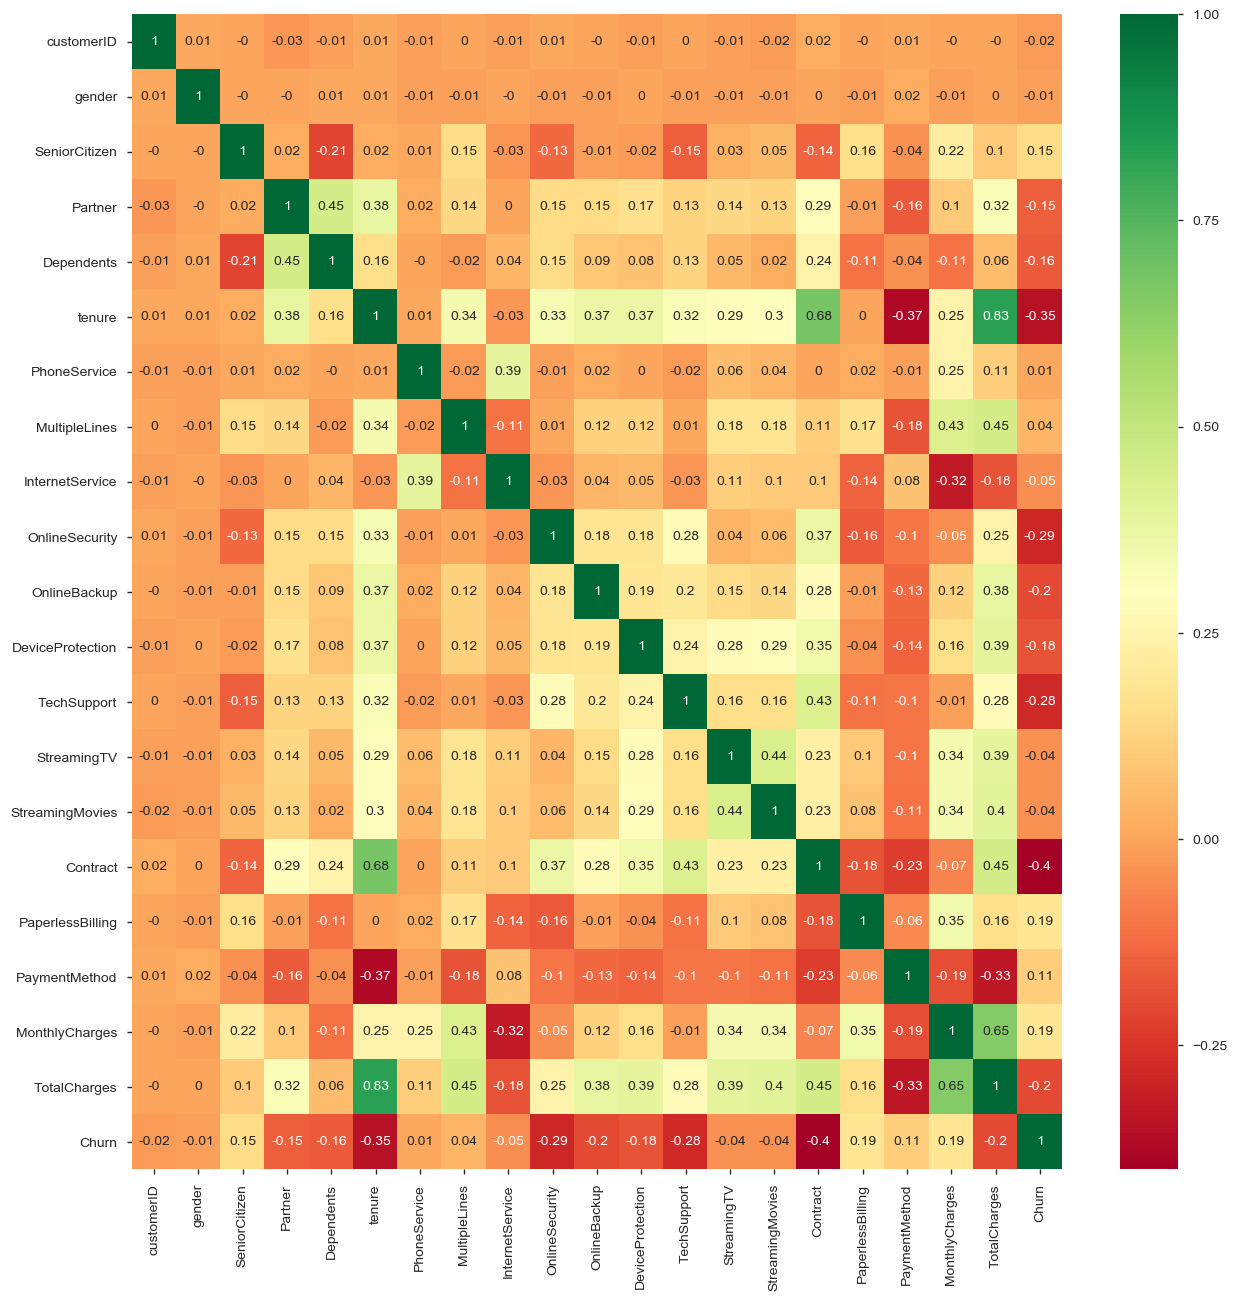

In [21]:
# compute the pair wise correlation for all columns  
correlation_matrix = rpTestData.corr().round(2)
plt.subplots(figsize=(15,15))
# use the heatmap function from seaborn to plot the correlation matrix
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, cmap='RdYlGn',annot=True)
plt.show();

# Train Test Split

In [28]:
y = rpTestData['Churn']
y.shape

(7032,)

In [29]:
X = rpTestData[['customerID','gender','SeniorCitizen','Partner','Dependents','tenure','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod','MonthlyCharges','TotalCharges']]
X.shape

(7032, 20)

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=1)
X_train.shape
X_test.shape
y_train.shape
y_test.shape
type(X_train)

(5274, 20)

(1758, 20)

(5274,)

(1758,)

pandas.core.frame.DataFrame

# Creating and Training the Model

In [54]:
from sklearn.linear_model import  LogisticRegression

lin_model = LogisticRegression()
lin_model.fit(X_train, y_train)

C:\Users\Somesh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [55]:
print('Coefficients: \n',lin_model.coef_)

Coefficients: 
 [[-3.19821923e-05 -5.96759797e-02  2.51931760e-01 -2.04924729e-02
  -1.68038138e-01 -6.27022398e-02 -4.70506201e-01  1.30356268e-01
   1.76980526e-02 -2.64281421e-01 -1.22115315e-01 -9.96096961e-02
  -2.68368560e-01  4.66009054e-02  6.45651174e-02 -7.09597404e-01
   3.05069549e-01 -3.52832093e-02  1.65663247e-02  3.43147106e-04]]


In [56]:
#Find out key predictor of churn
coeff= pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(lin_model.coef_))], axis=1)
coeff.columns=("Variable","Coeff")
coeff.sort_values("Variable",ascending=True)

,Variable,Coeff
15,Contract,-0.709597
4,Dependents,-0.168038
11,DeviceProtection,-0.099610
8,InternetService,0.017698
18,MonthlyCharges,0.016566
7,MultipleLines,0.130356
10,OnlineBackup,-0.122115
9,OnlineSecurity,-0.264281
16,PaperlessBilling,0.305070
3,Partner,-0.020492


## Predicting Test Data

In [57]:
#Generate Model Diagnostics
predictions = lin_model.predict(X_test)
print(predictions.size)

print("Positive cases in Test Data",y_test[y_test==1].shape[0])
print("Negative cases in Test Data",y_test[y_test==0].shape[0])

1758
Positive cases in Test Data 464
Negative cases in Test Data 1294


## Precision and Recall

In [ ]:
# Precision and Recall
print('Accuracy Score')
print(metrics.accuracy_score(y_test,predictions))
print('Precision/Recall Metrices')
print(metrics.classification_report(y_test,predictions))
print('AUC')
print(metrics.roc_auc_score(y_test,predictions))

# ROC Chart

Text(0.5,1,'ROCR CHART')

(0, 1)

(0, 1)

Text(0,0.5,'True Positive Rate')

Text(0.5,0,'False Positive Rate')

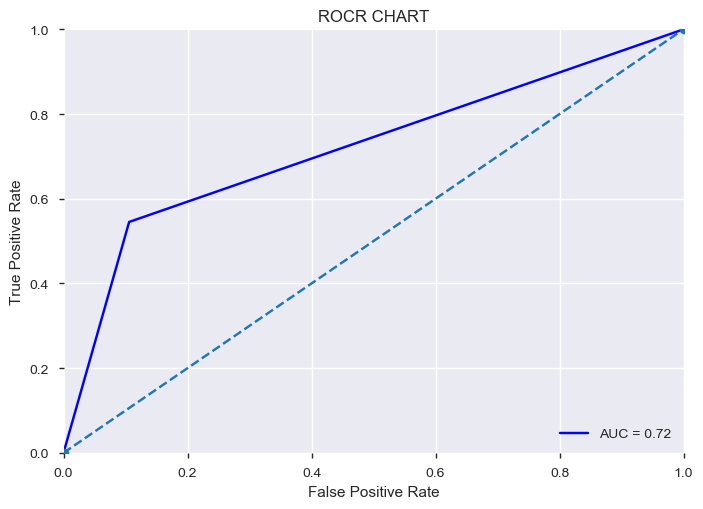

In [59]:
#ROC Chart
fpr, tpr, th = roc_curve(y_test,predictions)
roc_auc = metrics.auc(fpr,tpr)
import matplotlib.pyplot as plt
plt.title('ROCR CHART')
plt.plot(fpr,tpr,'b', label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'o--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Confusion Matrix

Confusion Matrix


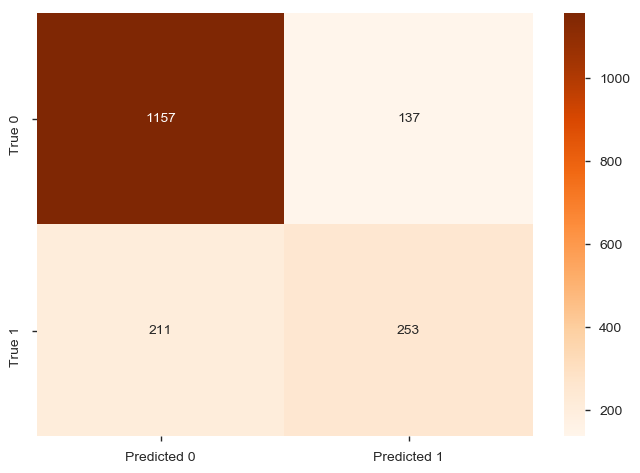

In [62]:
#Confusion Matrix
print("Confusion Matrix")
cf = metrics.confusion_matrix(y_test,predictions)
lbl1 = ["Predicted 0","Predicted 1"]
lbl2 = ["True 0", "True 1"]
sns.heatmap(cf, annot=True, cmap="Oranges", fmt="d", xticklabels=lbl1, yticklabels=lbl2)
plt.show()